# Analysis of Accelerator-VC Bipartite Networks

Analysis of the USA accelerator-VC network using ecological metrics inspired by Theo's work on complex networks in entrepreneurial ecosystems.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sys

# sys.path.append('../../') 

# Import custom modules
from libs.data_cleaning import *
from libs.data_extraction import *
from libs.network_analysis import *

plt.style.use('default')
sns.set_palette('husl')

## Data Loading and Preparation

In [8]:
country = "france"
data_dir = f'../../data/{country}'
cleaned_data = load_clean_data(data_dir)

companies_clean = cleaned_data['companies']
investors_clean = cleaned_data['investors']
investments_clean = cleaned_data['investments']
funding_rounds_clean = cleaned_data['funding_rounds']

print(f"After cleaning:")
print(f"Companies: {len(companies_clean):,}")
print(f"Investors: {len(investors_clean):,}")
print(f"Investments: {len(investments_clean):,}")
print(f"Funding rounds: {len(funding_rounds_clean):,}")

After cleaning:
Companies: 2,361
Investors: 4,564
Investments: 10,163
Funding rounds: 14,375


## Accelerator-VC Network Construction

In [ ]:
accelerated_investments = extract_accelerator_investments(cleaned_data['investments'])

vc_investments = extract_vc_investments(cleaned_data['investments'])

print("\nSample of VC investments:")
if 'company_name' in vc_investments.columns:
    display_cols = ['company_name', 'investor_name', 'investor_types', 'total_funding_usd']
    print(vc_investments[display_cols].head())
else:
    print(vc_investments[['org_uuid', 'investor_name', 'investor_types']].head())
    
print("\nAccelerator-VC pairs:")
accelerator_vc_investments_pairs = create_investment_pairs(accelerated_investments, vc_investments, 'acc', 'vc')
accelerator_vc_investments_pairs['announced_year'] = accelerator_vc_investments_pairs[['announced_year_acc', 'announced_year_vc']].max(axis=1)
accelerator_vc_investments_pairs['total_funding_usd'] = (
    accelerator_vc_investments_pairs['total_funding_usd_acc']
    + accelerator_vc_investments_pairs['total_funding_usd_vc']
)
print(accelerator_vc_investments_pairs[['org_uuid', 'investor_name_acc', 'investor_name_vc', 'announced_year']].head())

Found 675 accelerator investments
Unique companies in accelerators: 483

Sample of accelerator investments:
       company_name    investor_name investor_types  total_funding_usd
127  La Cartoonerie            WILCO    accelerator           676000.0
173         Force-A            WILCO    accelerator          7488077.0
246        Geodruid            WILCO    accelerator           177526.0
385         Homeloc        Netangels    accelerator           131845.0
492        Mobypark  Startupbootcamp    accelerator           837000.0
Found 5705 VC investments
Unique companies with VC funding: 1835

Sample of VC investments:
           company_name      investor_name  \
0                TVtrip  Balderton Capital   
1                TVtrip            Partech   
2                Twenga           3i Group   
4                 MyFab              Alven   
6  Inspirational Stores      Atlas Venture   

                        investor_types  total_funding_usd  
0                      venture capita

,uuid_acc,investor_uuid_acc,investor_name_acc,investor_types_acc,org_uuid,total_funding_usd_acc,announced_year_acc,uuid_vc,investor_uuid_vc,investor_name_vc,investor_types_vc,company_name,category_groups_list,investment_type,total_funding_usd_vc,announced_year_vc,announced_year,total_funding_usd
0,4851b3ce-f60c-7211-1e9f-847da8b0b9d9,8cbd9845-c791-b45e-047e-c6385a72dc05,WILCO,accelerator,6b399940-4fa0-b5a3-30ae-396d0fec6c09,676000.0,2007,011215aa-467c-1222-37f9-f24d7c3028d8,5fbfa25d-5b77-2568-07c4-6a2323b39885,Club Invest 77,"angel group,venture capital",La Cartoonerie,"Community and Lifestyle,Internet Services,Soft...",series_a,676000.0,2007,2007,1352000.0
1,e5dad368-7d49-e33f-9be5-d586b3e0590e,8cbd9845-c791-b45e-047e-c6385a72dc05,WILCO,accelerator,e8a05c96-5073-f3cc-95a7-7f9bfa60dc50,7488077.0,2007,2f04f882-08dd-6013-0ddd-e423fb1a7785,a51858e8-9325-d5c5-06be-577ed76a87d5,Scientipole Ile-de-France Capital,venture capital,Force-A,"Agriculture and Farming,Biotechnology,Hardware...",series_b,7488077.0,2009,2009,14976154.0
2,e5dad368-7d49-e33f-9be5-d586b3e0590e,8cbd9845-c791-b45e-047e-c6385a72dc05,WILCO,accelerator,e8a05c96-5073-f3cc-95a7-7f9bfa60dc50,7488077.0,2007,bb79eee3-98fe-834f-7d13-83767f4ab04f,e6738e5d-4505-7376-f8aa-147cd26b7015,IXcore,venture capital,Force-A,"Agriculture and Farming,Biotechnology,Hardware...",series_a,7488077.0,2007,2007,14976154.0
3,e5dad368-7d49-e33f-9be5-d586b3e0590e,8cbd9845-c791-b45e-047e-c6385a72dc05,WILCO,accelerator,e8a05c96-5073-f3cc-95a7-7f9bfa60dc50,7488077.0,2007,d7f14fc1-74be-47f3-8377-ac69882ba7a9,42c47a8f-efa7-b642-3531-f5dbe0ff3710,Gogreen Capital,venture capital,Force-A,"Agriculture and Farming,Biotechnology,Hardware...",series_unknown,7488077.0,2015,2015,14976154.0
4,e5dad368-7d49-e33f-9be5-d586b3e0590e,8cbd9845-c791-b45e-047e-c6385a72dc05,WILCO,accelerator,e8a05c96-5073-f3cc-95a7-7f9bfa60dc50,7488077.0,2007,85c11bc3-1e78-4ccb-87e5-6e9c780693e9,93682534-885e-3639-6a5e-e5ab3e6db2d4,Capagro,venture capital,Force-A,"Agriculture and Farming,Biotechnology,Hardware...",series_unknown,7488077.0,2015,2015,14976154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,594ce191-2ca1-4828-a73b-5a48be79c472,1f67a982-904b-486b-a114-cee576b9a53a,Bpifrance Digital Venture,"accelerator,venture debt",ed47227a-aff7-46b0-11e5-29066b70cb17,137912490.0,2025,92801872-64bf-4057-99af-9abb6be7759f,90b74210-e09d-d062-706a-4d60155eac82,NGP Capital,venture capital,Shippeo,"Other,Software,Transportation",series_unknown,137912490.0,2025,2025,275824980.0
2906,594ce191-2ca1-4828-a73b-5a48be79c472,1f67a982-904b-486b-a114-cee576b9a53a,Bpifrance Digital Venture,"accelerator,venture debt",ed47227a-aff7-46b0-11e5-29066b70cb17,137912490.0,2025,6e4d3d25-cb4d-4655-891c-8fa61f6ab2a7,7475db43-36a9-414d-f7a9-b92b78bae47b,Partech,venture capital,Shippeo,"Other,Software,Transportation",series_unknown,137912490.0,2025,2025,275824980.0
2907,594ce191-2ca1-4828-a73b-5a48be79c472,1f67a982-904b-486b-a114-cee576b9a53a,Bpifrance Digital Venture,"accelerator,venture debt",ed47227a-aff7-46b0-11e5-29066b70cb17,137912490.0,2025,5ae42190-5724-46f4-b510-30f6dcbbb5bb,a5f3ed73-e606-858b-558f-fb069b751448,Yamaha Motor Ventures,corporate venture capital,Shippeo,"Other,Software,Transportation",series_unknown,137912490.0,2025,2025,275824980.0
2908,594ce191-2ca1-4828-a73b-5a48be79c472,1f67a982-904b-486b-a114-cee576b9a53a,Bpifrance Digital Venture,"accelerator,venture debt",ed47227a-aff7-46b0-11e5-29066b70cb17,137912490.0,2025,4aa9a033-1550-4294-9e2d-cfc8c1bcd9f6,97706f43-75c9-40f3-a89a-9e8f193d8fdf,LFX Venture Partners,venture capital,Shippeo,"Other,Software,Transportation",series_unknown,137912490.0,2025,2025,275824980.0


## Static Ecological Network Analysis

Analysis using ecological metrics inspired by Carniel's framework.

In [ ]:
# Bbipartite analysis with ecological metrics
network_analysis = analyze_bipartite_structure_robust(
    accelerator_vc_investments_pairs[['investor_name_acc', 'investor_name_vc', 'total_funding_usd']],
    'investor_name_acc',
    'investor_name_vc',
    'total_funding_usd',
    'Accelerators',
    'VCs',
    handle_overlap='suffix'
)

# Extract key metrics
basic_metrics = network_analysis['basic_metrics']
ecological_summary = network_analysis['ecological_summary']

print("=== Network Structure ===")
print(f"Nodes: {basic_metrics['num_nodes']} ({basic_metrics['set_0_size']} accelerators + {basic_metrics['set_1_size']} VCs)")
print(f"Edges: {basic_metrics['num_edges']}")
print(f"Density: {basic_metrics['density']:.3f}")
print(f"Components: {basic_metrics['num_components']}")

print("\n=== Ecological Metrics ===")
print(f"Connectance: {ecological_summary['connectance']:.3f}") # Or density
print(f"Nestedness (NODF): {ecological_summary['nestedness_nodf']:.1f}")
print(f"Modularity: {ecological_summary['modularity']:.3f}")

# @todo review cross assortativity, maybe doenst make sense
# print(f"Cross-assortativity: {ecological_summary['cross_assortativity']:.3f}")

Overlapping nodes: ['Raise Ventures']
Added suffixes to create pseudo-bipartite structure
=== Network Structure ===
Nodes: 744 (117 accelerators + 627 VCs)
Edges: 1352
Density: 0.018
Components: 12

=== Ecological Metrics ===
Connectance: 0.018
Nestedness (NODF): 11.0
Modularity: 0.302


In [11]:
# Ecological interpretation
ecology_summary = summarize_bipartite_ecology(network_analysis)

print("=== Ecological Interpretation ===")
print(f"Network Type: {ecology_summary['network_type']}")
print(f"Connectance: {ecology_summary['connectance_interpretation']}")
print(f"Nestedness: {ecology_summary['nestedness_interpretation']}")
print(f"Modularity: {ecology_summary['modularity_interpretation']}")
print(f"Resilience: {ecology_summary['resilience_prediction']}")

=== Ecological Interpretation ===
Network Type: Modular (compartmentalized)
Connectance: Low connectance - sparse network
Nestedness: Low nestedness - modular structure
Modularity: High modularity - strong community structure
Resilience: Variable resilience patterns


#### Comments

Putting aside all the work that should be done to formaliza and "prove" statistically wheter such values are high, or low, I'll try to interpretate them through the lens of Network Theory, in special Social Network Theory. As we are talking about a bipartite network, ecology and mutualistic (polnazator-plants) theory will also be considered.
 
Starting by nesteness. For the french network, we've got a low (is it statistically true?) value. It means multiple things, I try to summarize some of them in the following list (not exhaustive, I am still searching for bilbiography):

- There isn't a so called "herarchical" or "mutualistic" structure, where less connected "polinizators" tend to interact with a subset of the "plants" polinized by more connected "polinizators". Slightly different interpretations (but  with similar practical consequences) ca
n be taken by considering either accelarators = polinizator and vc = plant or, the opposite, vc = polinizator and accelarator = plant.

- In any case, nestedness is also related to the vunerability of the ecosystem we're studing. It's hard to affirm categorically that a network is more vunerable or less vunerable by looking to nestedness, but we can characterize this vunerability. In one hand, higher nestedness is associated with economic resilience to external crisis in economic complexity theory (Theo has good references on that regard), but it also means that the "distribution" of how much each actor (either accelarator or vc) contributes to the overall resilience (or vunerability) is concentrated in a restricted (and probably small) group of agents. So if a strongly connected agent, which would be probably more resilient and predictable (need to prove it...), faces bankrupcy, for sure a more hierarchised (higher nestedness) will sufer more.

- From a more ecological perspective, higher nestedness tends to be associated with fewer competitaion between species, which lead to more biodiveristy, increasing "structural stability". However, disturbs on generalists tends to result on accelerated species exhaustion / depletion, as specialists become isolated (consequence of nestedness structure). So if the French acc-vc ecosystem has possibily low nestedness, the opposite line of reasoning must be applied.

Now if we look to connectance (measure the density of links, aka, ratio of number of existing links and all possible links) and modularity (indicates how sparse a matrix is, normally associated with the formation of clusters or community structures), most probably we'll be able to indentify clusters, as high modularity is associated with sparse matrix and low connectance may facilitate the visualization and interpretation of such clusters (to be obtained with non-supervised learning....)

## Time Series Ecological Network Analysis

In [ ]:
# Extract year from funding rounds for time series analysis
# Merge investment data with funding rounds to get temporal information
acc_vc_inv_pairs_ts = accelerator_vc_investments_pairs.copy()

# Convert to datetime and extract year
# acc_vc_inv_pairs_ts['announced_year'] = pd.to_datetime(acc_vc_inv_pairs_ts['announced_year'])
acc_vc_inv_pairs_ts['year'] = acc_vc_inv_pairs_ts['announced_year']

# Get the range of years
min_year = 2005
max_year = 2023

# Filter out rows with missing dates
acc_vc_inv_pairs_ts = acc_vc_inv_pairs_ts.dropna(subset=['year'])
acc_vc_inv_pairs_ts = acc_vc_inv_pairs_ts[(acc_vc_inv_pairs_ts['year'] >= min_year) & (acc_vc_inv_pairs_ts['year'] <= max_year)]


print(f"Time series analysis from {min_year} to {max_year}")
print(f"Total investments with dates: {len(acc_vc_inv_pairs_ts):,}")

# Show distribution by year
year_counts = acc_vc_inv_pairs_ts['year'].value_counts().sort_index()
print(f"\nInvestments per year:")
print(year_counts)

Time series analysis from 2011 to 2023
Total investments with dates: 2,603

Investments per year:
year
2011     14
2012      4
2013     19
2014     71
2015    160
2016    171
2017    291
2018    294
2019    361
2020    226
2021    346
2022    355
2023    291
Name: count, dtype: int64


,uuid_acc,investor_uuid_acc,investor_name_acc,investor_types_acc,org_uuid,total_funding_usd_acc,announced_year_acc,uuid_vc,investor_uuid_vc,investor_name_vc,investor_types_vc,company_name,category_groups_list,investment_type,total_funding_usd_vc,announced_year_vc,announced_year,total_funding_usd
0,4851b3ce-f60c-7211-1e9f-847da8b0b9d9,8cbd9845-c791-b45e-047e-c6385a72dc05,WILCO,accelerator,6b399940-4fa0-b5a3-30ae-396d0fec6c09,676000.0,2007,011215aa-467c-1222-37f9-f24d7c3028d8,5fbfa25d-5b77-2568-07c4-6a2323b39885,Club Invest 77,"angel group,venture capital",La Cartoonerie,"Community and Lifestyle,Internet Services,Soft...",series_a,676000.0,2007,2007,1352000.0
1,e5dad368-7d49-e33f-9be5-d586b3e0590e,8cbd9845-c791-b45e-047e-c6385a72dc05,WILCO,accelerator,e8a05c96-5073-f3cc-95a7-7f9bfa60dc50,7488077.0,2007,2f04f882-08dd-6013-0ddd-e423fb1a7785,a51858e8-9325-d5c5-06be-577ed76a87d5,Scientipole Ile-de-France Capital,venture capital,Force-A,"Agriculture and Farming,Biotechnology,Hardware...",series_b,7488077.0,2009,2009,14976154.0
2,e5dad368-7d49-e33f-9be5-d586b3e0590e,8cbd9845-c791-b45e-047e-c6385a72dc05,WILCO,accelerator,e8a05c96-5073-f3cc-95a7-7f9bfa60dc50,7488077.0,2007,bb79eee3-98fe-834f-7d13-83767f4ab04f,e6738e5d-4505-7376-f8aa-147cd26b7015,IXcore,venture capital,Force-A,"Agriculture and Farming,Biotechnology,Hardware...",series_a,7488077.0,2007,2007,14976154.0
3,e5dad368-7d49-e33f-9be5-d586b3e0590e,8cbd9845-c791-b45e-047e-c6385a72dc05,WILCO,accelerator,e8a05c96-5073-f3cc-95a7-7f9bfa60dc50,7488077.0,2007,d7f14fc1-74be-47f3-8377-ac69882ba7a9,42c47a8f-efa7-b642-3531-f5dbe0ff3710,Gogreen Capital,venture capital,Force-A,"Agriculture and Farming,Biotechnology,Hardware...",series_unknown,7488077.0,2015,2015,14976154.0
4,e5dad368-7d49-e33f-9be5-d586b3e0590e,8cbd9845-c791-b45e-047e-c6385a72dc05,WILCO,accelerator,e8a05c96-5073-f3cc-95a7-7f9bfa60dc50,7488077.0,2007,85c11bc3-1e78-4ccb-87e5-6e9c780693e9,93682534-885e-3639-6a5e-e5ab3e6db2d4,Capagro,venture capital,Force-A,"Agriculture and Farming,Biotechnology,Hardware...",series_unknown,7488077.0,2015,2015,14976154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,594ce191-2ca1-4828-a73b-5a48be79c472,1f67a982-904b-486b-a114-cee576b9a53a,Bpifrance Digital Venture,"accelerator,venture debt",ed47227a-aff7-46b0-11e5-29066b70cb17,137912490.0,2025,92801872-64bf-4057-99af-9abb6be7759f,90b74210-e09d-d062-706a-4d60155eac82,NGP Capital,venture capital,Shippeo,"Other,Software,Transportation",series_unknown,137912490.0,2025,2025,275824980.0
2906,594ce191-2ca1-4828-a73b-5a48be79c472,1f67a982-904b-486b-a114-cee576b9a53a,Bpifrance Digital Venture,"accelerator,venture debt",ed47227a-aff7-46b0-11e5-29066b70cb17,137912490.0,2025,6e4d3d25-cb4d-4655-891c-8fa61f6ab2a7,7475db43-36a9-414d-f7a9-b92b78bae47b,Partech,venture capital,Shippeo,"Other,Software,Transportation",series_unknown,137912490.0,2025,2025,275824980.0
2907,594ce191-2ca1-4828-a73b-5a48be79c472,1f67a982-904b-486b-a114-cee576b9a53a,Bpifrance Digital Venture,"accelerator,venture debt",ed47227a-aff7-46b0-11e5-29066b70cb17,137912490.0,2025,5ae42190-5724-46f4-b510-30f6dcbbb5bb,a5f3ed73-e606-858b-558f-fb069b751448,Yamaha Motor Ventures,corporate venture capital,Shippeo,"Other,Software,Transportation",series_unknown,137912490.0,2025,2025,275824980.0
2908,594ce191-2ca1-4828-a73b-5a48be79c472,1f67a982-904b-486b-a114-cee576b9a53a,Bpifrance Digital Venture,"accelerator,venture debt",ed47227a-aff7-46b0-11e5-29066b70cb17,137912490.0,2025,4aa9a033-1550-4294-9e2d-cfc8c1bcd9f6,97706f43-75c9-40f3-a89a-9e8f193d8fdf,LFX Venture Partners,venture capital,Shippeo,"Other,Software,Transportation",series_unknown,137912490.0,2025,2025,275824980.0


### Snapshot-based analysis

In [ ]:
# Initialize storage for time series metrics
time_series_metrics = []

# Minimum number of edges required for meaningful analysis
min_edges_threshold = 10

print("Computing ecological metrics for each year...")
print("=" * 50)

# Loop through each year and calculate metrics
for year in range(min_year, max_year + 1):
    cur_year_acc_vc_inv_pairs = acc_vc_inv_pairs_ts[acc_vc_inv_pairs_ts['year'] == year]

    if len(cur_year_acc_vc_inv_pairs) < min_edges_threshold:
        print(f"Year {year}: Skipping (only {len(cur_year_acc_vc_inv_pairs)} investments)")
        continue
    
    try:
        # Extract bipartite edges for this year
        """ year_edges = extract_bipartite_edges_from_pairs(
            cur_year_acc_vc_inv_pairs,
            'investor_name_acc',
            'investor_name_vc',
            'total_funding_usd'
        ) """

        # Analyze bipartite structure for this year
        year_analysis = analyze_bipartite_structure_robust(
            cur_year_acc_vc_inv_pairs[['investor_name_acc', 'investor_name_vc', 'total_funding_usd']],
            'investor_name_acc',
            'investor_name_vc',
            'total_funding_usd',
            'Accelerators',
            'VCs',
            handle_overlap='suffix'
        )
        
        # Extract metrics
        basic_metrics = year_analysis['basic_metrics']
        ecological_summary = year_analysis['ecological_summary']
        
        # Store metrics for this year
        year_metrics = {
            'year': year,
            'num_nodes': basic_metrics['num_nodes'],
            'num_accelerators': basic_metrics['set_0_size'],
            'num_vcs': basic_metrics['set_1_size'],
            'num_edges': basic_metrics['num_edges'],
            'density': basic_metrics['density'],
            'connectance': ecological_summary['connectance'],
            'nestedness_nodf': ecological_summary['nestedness_nodf'],
            'modularity': ecological_summary['modularity'],
            'cross_assortativity': ecological_summary['cross_assortativity'],
            'num_components': basic_metrics['num_components']
        }
        
        time_series_metrics.append(year_metrics)
        
        print(f"Year {year}: {basic_metrics['num_nodes']} nodes, {basic_metrics['num_edges']} edges, "
              f"Connectance: {ecological_summary['connectance']:.3f}, "
              f"Nestedness: {ecological_summary['nestedness_nodf']:.1f}, "
              f"Modularity: {ecological_summary['modularity']:.3f}")
        
    except Exception as e:
        print(f"Year {year}: Error - {str(e)}")
        continue

print(f"\nSuccessfully analyzed {len(time_series_metrics)} years")

Computing ecological metrics for each year...
Year 2011: 19 nodes, 13 edges, Connectance: 0.167, Nestedness: 0.0, Modularity: 0.439
Year 2012: Skipping (only 4 investments)
Year 2013: 25 nodes, 17 edges, Connectance: 0.110, Nestedness: 13.4, Modularity: 0.427
Year 2014: 56 nodes, 55 edges, Connectance: 0.098, Nestedness: 11.8, Modularity: 0.393
Year 2015: 96 nodes, 105 edges, Connectance: 0.063, Nestedness: 18.2, Modularity: 0.386
Year 2016: 108 nodes, 139 edges, Connectance: 0.071, Nestedness: 19.4, Modularity: 0.329
Year 2017: 135 nodes, 192 edges, Connectance: 0.060, Nestedness: 17.1, Modularity: 0.316
Year 2018: 170 nodes, 212 edges, Connectance: 0.041, Nestedness: 16.9, Modularity: 0.353
Year 2019: 189 nodes, 258 edges, Connectance: 0.040, Nestedness: 14.1, Modularity: 0.368
Year 2020: 160 nodes, 188 edges, Connectance: 0.044, Nestedness: 13.1, Modularity: 0.385
Year 2021: 211 nodes, 247 edges, Connectance: 0.033, Nestedness: 10.5, Modularity: 0.397
Year 2022: 198 nodes, 251 edges

In [14]:
# Convert to DataFrame for easier analysis and plotting
ts_df = pd.DataFrame(time_series_metrics)

if len(ts_df) > 0:
    print("Time Series Metrics Summary:")
    print(ts_df.describe().round(3))
    
    print(f"\nData available for years: {ts_df['year'].min()} to {ts_df['year'].max()}")
    print(f"Number of years analyzed: {len(ts_df)}")
else:
    print("No time series data available for analysis")

Time Series Metrics Summary:
           year  num_nodes  num_accelerators  num_vcs  num_edges  density  \
count    12.000     12.000            12.000   12.000     12.000   12.000   
mean   2017.417    129.833            29.250  100.583    157.333    0.067   
std       3.753     68.340            13.739   54.761     89.965    0.040   
min    2011.000     19.000             6.000   13.000     13.000    0.033   
25%    2014.750     86.000            20.500   65.500     92.500    0.040   
50%    2017.500    147.500            32.500  115.000    190.000    0.052   
75%    2020.250    189.500            40.250  146.500    220.750    0.078   
max    2023.000    211.000            45.000  166.000    258.000    0.167   

       connectance  nestedness_nodf  modularity  cross_assortativity  \
count       12.000           12.000      12.000               11.000   
mean         0.067           12.696       0.384                0.073   
std          0.040            5.319       0.037              

Evolution of ecological metrics over time in the accelerator-VC ecosystem.

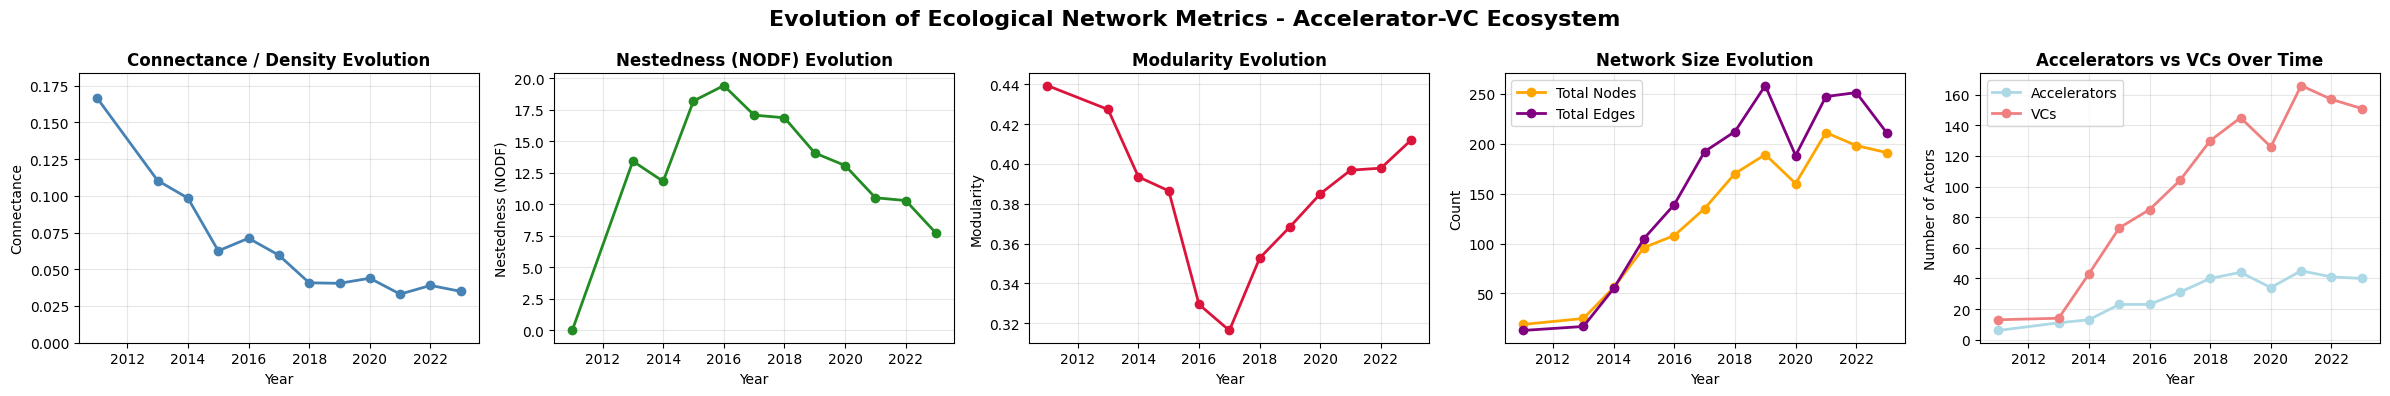

In [15]:
if len(ts_df) > 0:
    # Create comprehensive time series plot
    fig, axes = plt.subplots(1, 5, figsize=(24, 4))
    fig.suptitle('Evolution of Ecological Network Metrics - Accelerator-VC Ecosystem', 
                 fontsize=16, fontweight='bold')
    
    # Connectance evolution
    axes[0].plot(ts_df['year'], ts_df['connectance'], 'o-', linewidth=2, markersize=6, color='steelblue')
    axes[0].set_title('Connectance / Density Evolution', fontweight='bold')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Connectance')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim(0, max(ts_df['connectance']) * 1.1)
    
    # Nestedness evolution
    axes[1].plot(ts_df['year'], ts_df['nestedness_nodf'], 'o-', linewidth=2, markersize=6, color='forestgreen')
    axes[1].set_title('Nestedness (NODF) Evolution', fontweight='bold')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Nestedness (NODF)')
    axes[1].grid(True, alpha=0.3)
    
    # Modularity evolution
    axes[2].plot(ts_df['year'], ts_df['modularity'], 'o-', linewidth=2, markersize=6, color='crimson')
    axes[2].set_title('Modularity Evolution', fontweight='bold')
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Modularity')
    axes[2].grid(True, alpha=0.3)
    
    # Network size evolution
    axes[3].plot(ts_df['year'], ts_df['num_nodes'], 'o-', linewidth=2, markersize=6, color='orange', label='Total Nodes')
    axes[3].plot(ts_df['year'], ts_df['num_edges'], 'o-', linewidth=2, markersize=6, color='purple', label='Total Edges')
    axes[3].set_title('Network Size Evolution', fontweight='bold')
    axes[3].set_xlabel('Year')
    axes[3].set_ylabel('Count')
    axes[3].legend()
    axes[3].grid(True, alpha=0.3)
    
    axes[4].plot(ts_df['year'], ts_df['num_accelerators'], 'o-', linewidth=2, markersize=6, 
                color='lightblue', label='Accelerators')
    axes[4].plot(ts_df['year'], ts_df['num_vcs'], 'o-', linewidth=2, markersize=6, 
                color='lightcoral', label='VCs')
    axes[4].set_title('Accelerators vs VCs Over Time', fontweight='bold')
    axes[4].set_xlabel('Year')
    axes[4].set_ylabel('Number of Actors')
    axes[4].legend()
    axes[4].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No data available for time series visualization")

=== Temporal Trends Analysis ===

Year-over-Year Changes (average):
connectance: -0.0120 per year (total: -0.1317)
nestedness_nodf: +0.7005 per year (total: +7.7057)
modularity: -0.0025 per year (total: -0.0273)
num_nodes: +15.6364 per year (total: +172.0000)
num_edges: +18.0000 per year (total: +198.0000)

Correlations between metrics and time:
connectance: r=-0.889 (decreasing trend)
nestedness_nodf: r=0.071 (stable trend)
modularity: r=-0.166 (decreasing trend)


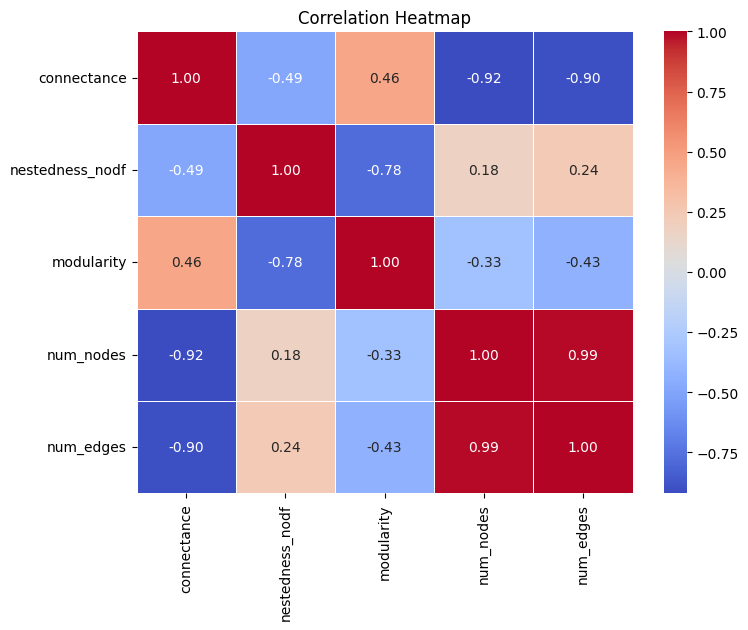

In [16]:
if len(ts_df) > 1:
    # Calculate trends and correlations
    print("=== Temporal Trends Analysis ===")
    
    # Calculate year-over-year changes
    ts_df_sorted = ts_df.sort_values('year')
    
    metrics_to_analyze = ['connectance', 'nestedness_nodf', 'modularity', 'num_nodes', 'num_edges']
    
    print("\nYear-over-Year Changes (average):")
    for metric in metrics_to_analyze:
        if metric in ts_df_sorted.columns:
            # Calculate differences
            diffs = ts_df_sorted[metric].diff().dropna()
            avg_change = diffs.mean()
            total_change = ts_df_sorted[metric].iloc[-1] - ts_df_sorted[metric].iloc[0]
            print(f"{metric}: {avg_change:+.4f} per year (total: {total_change:+.4f})")
    
    # Correlation analysis
    print("\nCorrelations between metrics and time:")
    for metric in ['connectance', 'nestedness_nodf', 'modularity']:
        if metric in ts_df.columns:
            correlation = ts_df['year'].corr(ts_df[metric])
            trend_direction = "increasing" if correlation > 0.1 else "decreasing" if correlation < -0.1 else "stable"
            print(f"{metric}: r={correlation:.3f} ({trend_direction} trend)")
            
    matrix = ts_df_sorted[metrics_to_analyze].corr()

    plt.figure(figsize=(8,6))
    sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

else:
    print("Insufficient data for temporal trends analysis (need at least 2 years)")

#### Comments

The time series analysis reveals how the French accelerator-VC ecosystem has evolved over time. Key insights to consider:

- **Connectance trends**: Changes in network density may indicate ecosystem maturation or market concentration
- **Nestedness evolution**: Temporal changes in hierarchical structure reflect ecosystem organization and potential vulnerability patterns
- **Modularity dynamics**: Evolution of community structure indicates specialization and clustering patterns
- **Growth patterns**: The relationship between network size and structural metrics reveals ecosystem scaling properties. Event scaling

These temporal patterns can be compared with economic cycles, policy changes, and market events to understand ecosystem resilience and adaptation mechanisms.

...Nestedness and modularity over year seems to follow inverse proportion

Before 2017 -> lower modularity and higher nestedness trends
After 20217 -> higher modularity and lower nestedess trends

- Why has it changed so much ?

Following literature interpretation:

**High modularity and low nestedness** → strongly compartmentalized networks, but without internal hierarchy.
Example: ecosystems with isolated guilds, almost no species overlap.

**Low modularity and high nestedness** → non-compartmentalized networks, but with a clear hierarchy of connections.
Example: mutualistic plant-pollinator networks in tropical ecosystems.

**High modularity and high nestedness** → rare, but possible if each module is internally nested (hierarchical structures within compartments).

**Low modularity and low nestedness** → more random networks, with no evident pattern.

### Cumulative network analysis (5 years window)

In [ ]:
# Initialize storage for time series metrics
ts_cumulative_metrics = []
cumulative_window = 5

# Minimum number of edges required for meaningful analysis
min_edges_threshold = 10

print(f"Computing ecological metrics for each year ({cumulative_window} years window)...")
print("=" * 50)

# Loop through each year and calculate metrics
for year in range(min_year + cumulative_window, max_year + 1):
    cur_window_acc_vc_inv_pairs = acc_vc_inv_pairs_ts[(acc_vc_inv_pairs_ts['year'] >= year) & (acc_vc_inv_pairs_ts['year'] >= year - cumulative_window)]
    
    try:
        # Extract bipartite edges for this year
        """ window_edges = extract_bipartite_edges_from_pairs(
            cur_window_acc_vc_inv_pairs,
            'investor_name_acc',
            'investor_name_vc',
            'total_funding_usd'
        ) """
        
        # Analyze bipartite structure for this year
        window_analysis = analyze_bipartite_structure_robust(
            cur_window_acc_vc_inv_pairs[['investor_name_acc', 'investor_name_vc', 'total_funding_usd']],
            'investor_name_acc',
            'investor_name_vc',
            'total_funding_usd',
            'Accelerators',
            'VCs',
            handle_overlap='suffix'
        )
        
        # Extract metrics
        cumulative_basic_metrics = window_analysis['basic_metrics']
        cumulative_eco_summary = window_analysis['ecological_summary']
        
        # Store metrics for this year
        cumulative_year_metrics = {
            'year': year,
            'num_nodes': cumulative_basic_metrics['num_nodes'],
            'num_accelerators': cumulative_basic_metrics['set_0_size'],
            'num_vcs': cumulative_basic_metrics['set_1_size'],
            'num_edges': cumulative_basic_metrics['num_edges'],
            'density': cumulative_basic_metrics['density'],
            'connectance': cumulative_eco_summary['connectance'],
            'nestedness_nodf': cumulative_eco_summary['nestedness_nodf'],
            'modularity': cumulative_eco_summary['modularity'],
            'cross_assortativity': cumulative_eco_summary['cross_assortativity'],
            'num_components': cumulative_basic_metrics['num_components']
        }
        
        ts_cumulative_metrics.append(cumulative_year_metrics)
        
        print(f"Year {year}: {cumulative_basic_metrics['num_nodes']} nodes, {cumulative_basic_metrics['num_edges']} edges, "
              f"Connectance: {cumulative_eco_summary['connectance']:.3f}, "
              f"Nestedness: {cumulative_eco_summary['nestedness_nodf']:.1f}, "
              f"Modularity: {cumulative_eco_summary['modularity']:.3f}")
        
    except Exception as e:
        print(f"Year {year}: Error - {str(e)}")
        continue

print(f"\nSuccessfully analyzed {len(ts_cumulative_metrics)} years")

Computing ecological metrics for each year (5 years window)...
Year 2011: 668 nodes, 1214 edges, Connectance: 0.020, Nestedness: 12.0, Modularity: 0.299
Year 2012: 666 nodes, 1209 edges, Connectance: 0.020, Nestedness: 11.9, Modularity: 0.299
Year 2013: 665 nodes, 1208 edges, Connectance: 0.020, Nestedness: 12.0, Modularity: 0.299
Year 2014: 661 nodes, 1202 edges, Connectance: 0.020, Nestedness: 12.0, Modularity: 0.300
Year 2015: 657 nodes, 1182 edges, Connectance: 0.020, Nestedness: 12.0, Modularity: 0.309
Year 2016: 636 nodes, 1125 edges, Connectance: 0.020, Nestedness: 11.9, Modularity: 0.304
Year 2017: 616 nodes, 1062 edges, Connectance: 0.020, Nestedness: 11.4, Modularity: 0.307
Year 2018: 595 nodes, 993 edges, Connectance: 0.020, Nestedness: 11.1, Modularity: 0.313
Year 2019: 554 nodes, 879 edges, Connectance: 0.020, Nestedness: 10.4, Modularity: 0.335
Year 2020: 500 nodes, 743 edges, Connectance: 0.020, Nestedness: 9.9, Modularity: 0.341
Year 2021: 449 nodes, 638 edges, Connecta

In [18]:
# Convert to DataFrame for easier analysis and plotting
ts_cumulative_df = pd.DataFrame(ts_cumulative_metrics)

if len(ts_cumulative_df) > 0:
    print("Time Series Metrics Summary:")
    print(ts_cumulative_df.describe().round(3))
    
    print(f"\nData available for years: {ts_cumulative_df['year'].min()} to {ts_cumulative_df['year'].max()}")
    print(f"Number of years analyzed: {len(ts_cumulative_df)}")
else:
    print("No time series data available for analysis")

Time Series Metrics Summary:
           year  num_nodes  num_accelerators  num_vcs  num_edges  density  \
count    13.000     13.000            13.000   13.000     13.000   13.000   
mean   2017.000    553.077            93.692  459.385    932.000    0.022   
std       3.894    149.206            21.546  127.727    329.498    0.004   
min    2011.000    191.000            40.000  151.000    211.000    0.020   
25%    2014.000    500.000            89.000  411.000    743.000    0.020   
50%    2017.000    616.000           103.000  513.000   1062.000    0.020   
75%    2020.000    661.000           108.000  553.000   1202.000    0.020   
max    2023.000    668.000           109.000  559.000   1214.000    0.035   

       connectance  nestedness_nodf  modularity  cross_assortativity  \
count       13.000           13.000      13.000               13.000   
mean         0.022           10.872       0.327               -0.040   
std          0.004            1.363       0.036              

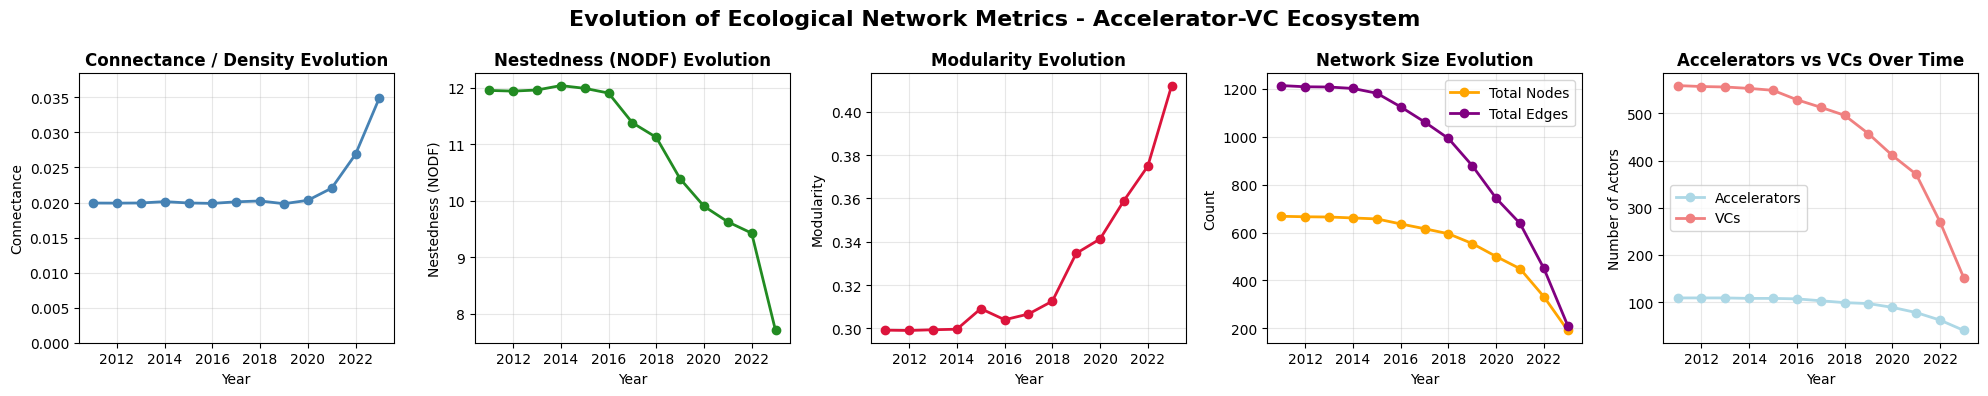

In [19]:
if len(ts_cumulative_df) > 0:
    # Create comprehensive time series plot
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle('Evolution of Ecological Network Metrics - Accelerator-VC Ecosystem', 
                 fontsize=16, fontweight='bold')
    
    # Connectance evolution
    axes[0].plot(ts_cumulative_df['year'], ts_cumulative_df['connectance'], 'o-', linewidth=2, markersize=6, color='steelblue')
    axes[0].set_title('Connectance / Density Evolution', fontweight='bold')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Connectance')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim(0, max(ts_cumulative_df['connectance']) * 1.1)
    
    # Nestedness evolution
    axes[1].plot(ts_cumulative_df['year'], ts_cumulative_df['nestedness_nodf'], 'o-', linewidth=2, markersize=6, color='forestgreen')
    axes[1].set_title('Nestedness (NODF) Evolution', fontweight='bold')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Nestedness (NODF)')
    axes[1].grid(True, alpha=0.3)
    
    # Modularity evolution
    axes[2].plot(ts_cumulative_df['year'], ts_cumulative_df['modularity'], 'o-', linewidth=2, markersize=6, color='crimson')
    axes[2].set_title('Modularity Evolution', fontweight='bold')
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Modularity')
    axes[2].grid(True, alpha=0.3)
    
    # Network size evolution
    axes[3].plot(ts_cumulative_df['year'], ts_cumulative_df['num_nodes'], 'o-', linewidth=2, markersize=6, color='orange', label='Total Nodes')
    axes[3].plot(ts_cumulative_df['year'], ts_cumulative_df['num_edges'], 'o-', linewidth=2, markersize=6, color='purple', label='Total Edges')
    axes[3].set_title('Network Size Evolution', fontweight='bold')
    axes[3].set_xlabel('Year')
    axes[3].set_ylabel('Count')
    axes[3].legend()
    axes[3].grid(True, alpha=0.3)
    
    axes[4].plot(ts_cumulative_df['year'], ts_cumulative_df['num_accelerators'], 'o-', linewidth=2, markersize=6, 
                color='lightblue', label='Accelerators')
    axes[4].plot(ts_cumulative_df['year'], ts_cumulative_df['num_vcs'], 'o-', linewidth=2, markersize=6, 
                color='lightcoral', label='VCs')
    axes[4].set_title('Accelerators vs VCs Over Time', fontweight='bold')
    axes[4].set_xlabel('Year')
    axes[4].set_ylabel('Number of Actors')
    axes[4].legend()
    axes[4].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No data available for time series visualization")

=== Temporal Trends Analysis ===

Year-over-Year Changes (average):
connectance: +0.0013 per year (total: +0.0150)
nestedness_nodf: -0.3538 per year (total: -4.2457)
modularity: +0.0094 per year (total: +0.1129)
num_nodes: -39.7500 per year (total: -477.0000)
num_edges: -83.5833 per year (total: -1003.0000)

Correlations between metrics and time:
connectance: r=0.655 (increasing trend)
nestedness_nodf: r=-0.906 (decreasing trend)
modularity: r=0.885 (increasing trend)


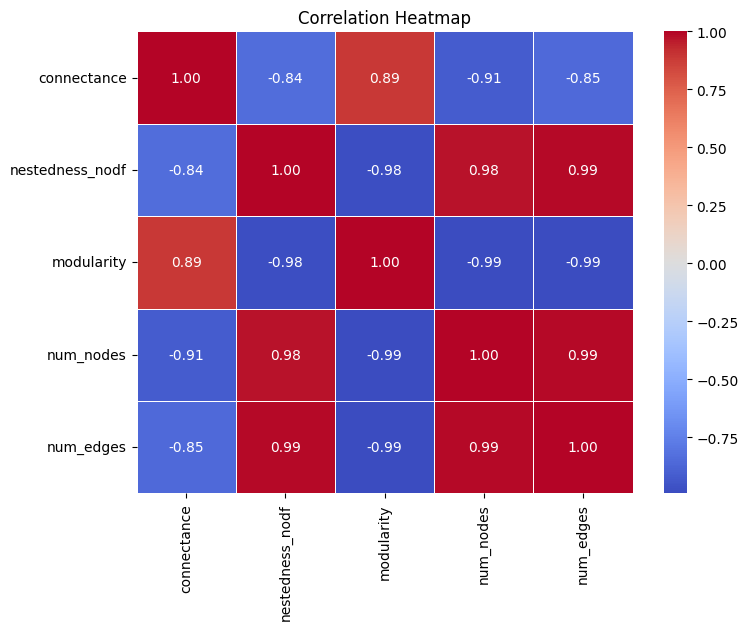

In [20]:
if len(ts_cumulative_df) > 1:
    # Calculate trends and correlations
    print("=== Temporal Trends Analysis ===")
    
    # Calculate year-over-year changes
    ts_cumulative_df_sorted = ts_cumulative_df.sort_values('year')
    
    cumulative_metrics_to_analyze = ['connectance', 'nestedness_nodf', 'modularity', 'num_nodes', 'num_edges']
    
    print("\nYear-over-Year Changes (average):")
    for metric in cumulative_metrics_to_analyze:
        if metric in ts_cumulative_df_sorted.columns:
            # Calculate differences
            diffs = ts_cumulative_df_sorted[metric].diff().dropna()
            avg_change = diffs.mean()
            total_change = ts_cumulative_df_sorted[metric].iloc[-1] - ts_cumulative_df_sorted[metric].iloc[0]
            print(f"{metric}: {avg_change:+.4f} per year (total: {total_change:+.4f})")
    
    # Correlation analysis
    print("\nCorrelations between metrics and time:")
    for metric in ['connectance', 'nestedness_nodf', 'modularity']:
        if metric in ts_cumulative_df.columns:
            correlation = ts_cumulative_df['year'].corr(ts_cumulative_df[metric])
            trend_direction = "increasing" if correlation > 0.1 else "decreasing" if correlation < -0.1 else "stable"
            print(f"{metric}: r={correlation:.3f} ({trend_direction} trend)")
            
    cum_matrix = ts_cumulative_df_sorted[cumulative_metrics_to_analyze].corr()

    plt.figure(figsize=(8,6))
    sns.heatmap(cum_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

else:
    print("Insufficient data for temporal trends analysis (need at least 2 years)")

## Export results

In [21]:
# Save time series results for further analysis
if len(ts_df) > 0:
    # Create comprehensive time series report
    time_series_report = {
        'dataset': f'Startup Ecosystem - Time Series ({country})',
        'analysis_date': '2025-07-26',
        'time_period': {
            'start_year': int(ts_df['year'].min()),
            'end_year': int(ts_df['year'].max()),
            'num_years_analyzed': len(ts_df)
        },
        'annual_metrics': ts_df.to_dict('records'),
        'trends': {}
    }
    
    # Add trend calculations if enough data
    if len(ts_df) > 1:
        for metric in ['connectance', 'nestedness_nodf', 'modularity']:
            correlation = ts_df['year'].corr(ts_df[metric])
            time_series_report['trends'][metric] = {
                'correlation_with_time': correlation,
                'trend_direction': 'increasing' if correlation > 0.1 else 'decreasing' if correlation < -0.1 else 'stable'
            }
    
    # Save to file
    import json
    with open(f'{country}_network_timeseries_2025.json', 'w') as f:
        json.dump(time_series_report, f, indent=2, default=str)
    
    print(f"Time series analysis saved to '{country}_network_timeseries_2025.json'")
    print(f"Analysis covers {len(ts_df)} years from {ts_df['year'].min()} to {ts_df['year'].max()}")
else:
    print("No time series data to save")

Time series analysis saved to 'france_network_timeseries_2025.json'
Analysis covers 12 years from 2011 to 2023


In [22]:
# Save report for future comparisons
""" import json
with open('network_report_2025.json', 'w') as f:
    json.dump(network_report, f, indent=2, default=str)

print("Network report saved to 'network_report_2025.json'")
print("Ready for comparative analysis with other datasets.") """

' import json\nwith open(\'network_report_2025.json\', \'w\') as f:\n    json.dump(network_report, f, indent=2, default=str)\n\nprint("Network report saved to \'network_report_2025.json\'")\nprint("Ready for comparative analysis with other datasets.") '